In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000) :
   results = np.zeros((len(sequences),dimension))
   for i , sequences in enumerate(sequences):
       results[i,sequences] = 1
       return results


x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000 ,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))





In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train , partial_y_train , epochs=20 , batch_size=512 , validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 5s 147ms/step - loss: 0.6932 - acc: 0.4983 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
30/30 [==============================] - 3s 98ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
30/30 [==============================] - 4s 151ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
30/30 [==============================] - 3s 113ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
30/30 [==============================] - 3s 87ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6931 

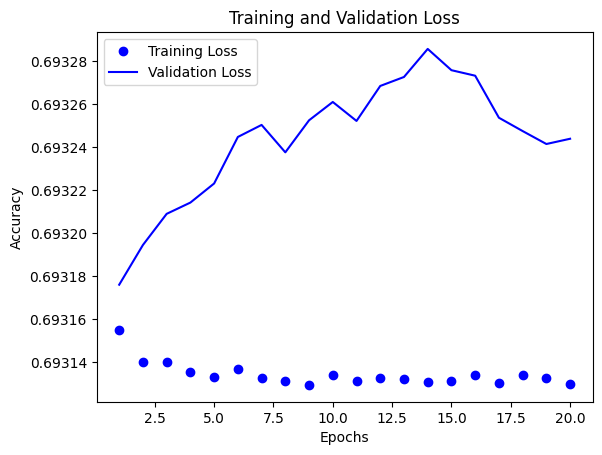

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)  + 1)
plt.plot(epochs,loss_values,'bo', label='Training Loss')
plt.plot(epochs,val_loss_values,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

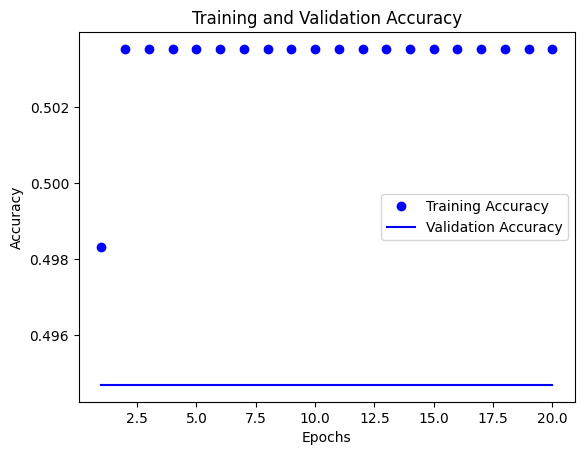

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo', label='Training Accuracy')
plt.plot(epochs,val_acc_values,'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.48501042],
       [0.49691042],
       [0.49691042],
       ...,
       [0.49691042],
       [0.49691042],
       [0.49691042]], dtype=float32)